In [38]:
import warnings
warnings.filterwarnings("ignore")  # For applying the ARIMA model. some errors
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

In [23]:
df = pd.read_csv(r"C:\Users\Bcrom\OneDrive\Desktop\DS4002\Mariah Carey\Data\merged_data.csv")

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.sort_values(by = 'Date')

,Date,AIWFC,Christmas,MariahCarey,Memes
0,2018-11-11,15,25,38,80
1,2018-11-18,19,35,52,81
2,2018-11-25,22,49,35,85
3,2018-12-02,38,53,36,81
4,2018-12-09,42,52,38,89
...,...,...,...,...,...
256,2023-10-08,7,7,17,32
257,2023-10-15,6,8,18,30
258,2023-10-22,7,10,19,32
259,2023-10-29,40,18,58,30


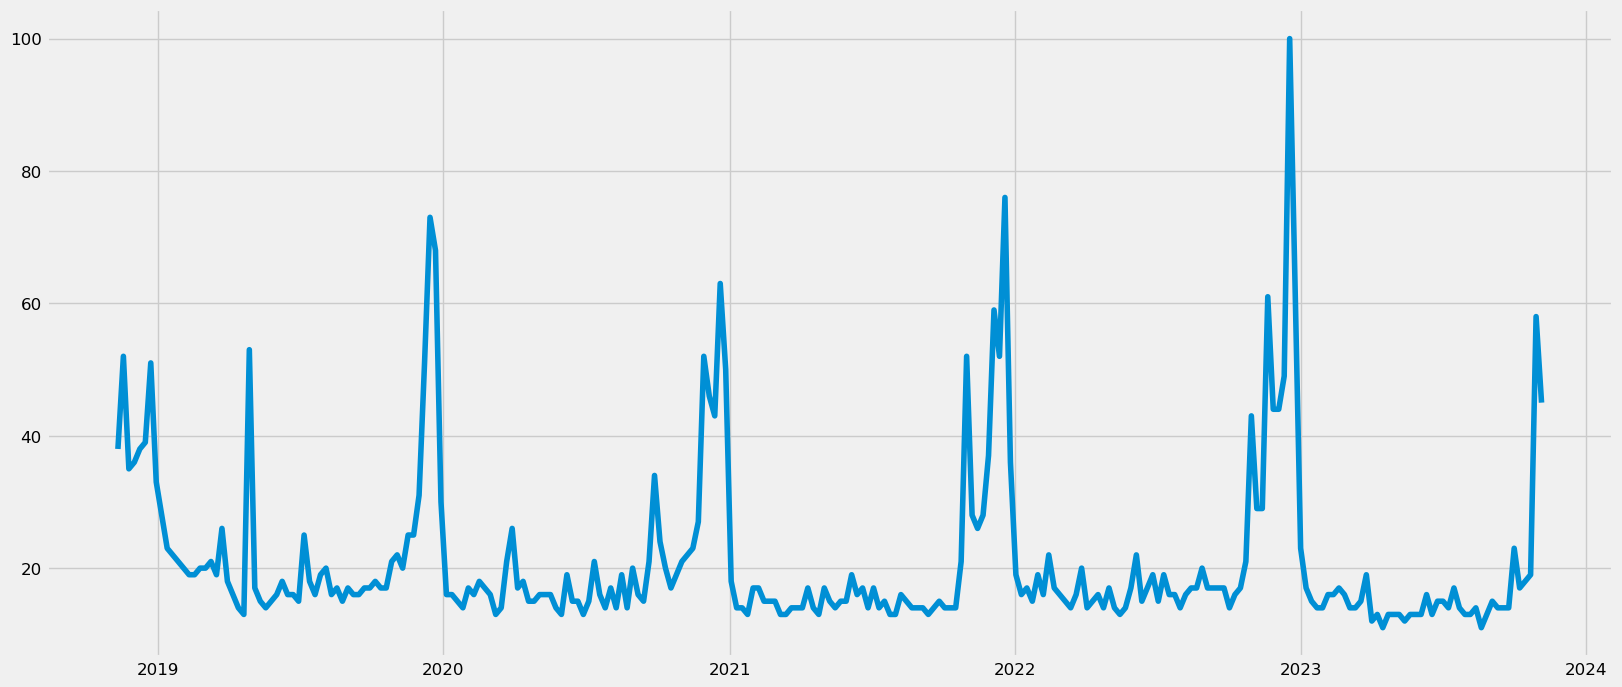

In [26]:
plt.plot(df['Date'], df['MariahCarey'])

In [27]:
df.isnull().sum()    # No NAs

Date           0
AIWFC          0
Christmas      0
MariahCarey    0
Memes          0
dtype: int64

In [28]:
df = df.groupby('Date')['MariahCarey'].sum().reset_index()
df = df.set_index('Date')
df.index

DatetimeIndex(['2018-11-11', '2018-11-18', '2018-11-25', '2018-12-02',
               '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30',
               '2019-01-06', '2019-01-13',
               ...
               '2023-09-03', '2023-09-10', '2023-09-17', '2023-09-24',
               '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
               '2023-10-29', '2023-11-05'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

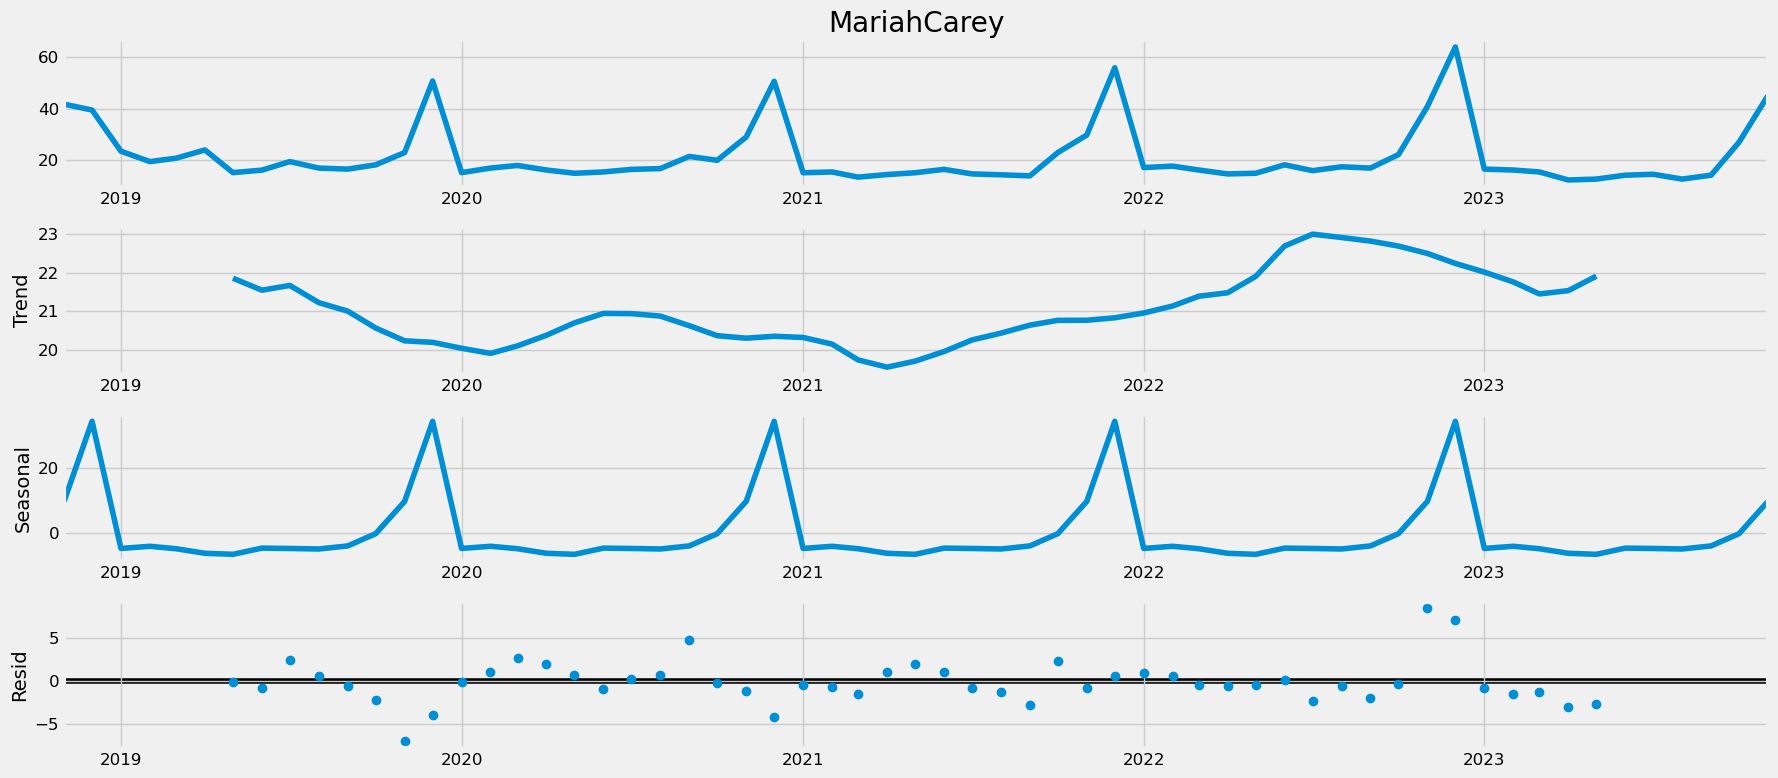

In [29]:
# Breaking down the time series into components to see noise.
y = df['MariahCarey'].resample('MS').mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq: 
        try: 
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:553.7086179833055
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:410.44999973553223
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:273.12241137734884
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:197.66138185591228
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:297.40366599373573
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:274.28522827708537
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:204.07275140325513
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:199.65517785809828
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:509.05212649666674
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:373.3169620145058
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:261.04462886465956
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:188.90204333283975
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:299.29786692426114
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:265.9364183424896
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:198.03805684548243
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:190.3953575444552
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:473.359987209108
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:350.1787381128097

In [43]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4457      0.266      1.677      0.093      -0.075       0.966
ma.L1         -1.0000   1306.494     -0.001      0.999   -2561.681    2559.681
ar.S.L12      -0.0410      0.177     -0.232      0.816      -0.387       0.305
sigma2        10.8773   1.42e+04      0.001      0.999   -2.78e+04    2.79e+04


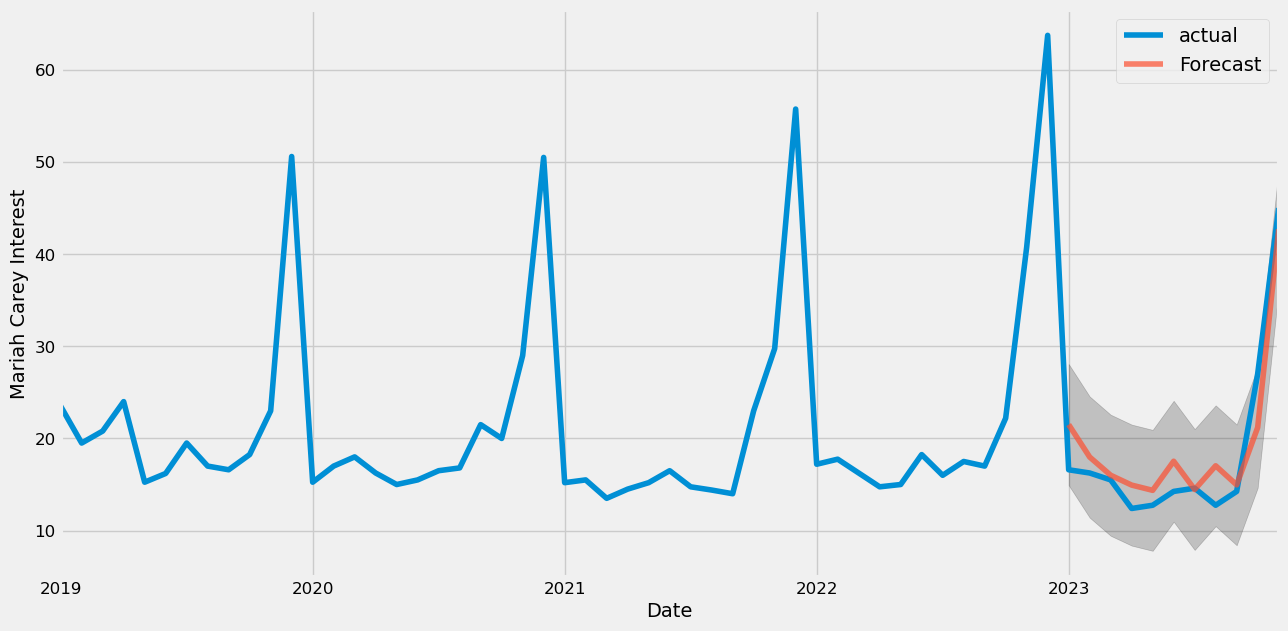

In [57]:
# Showing our forecast
pred = results.get_prediction(start = pd.to_datetime('2023-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mariah Carey Interest')
plt.legend()
plt.show()

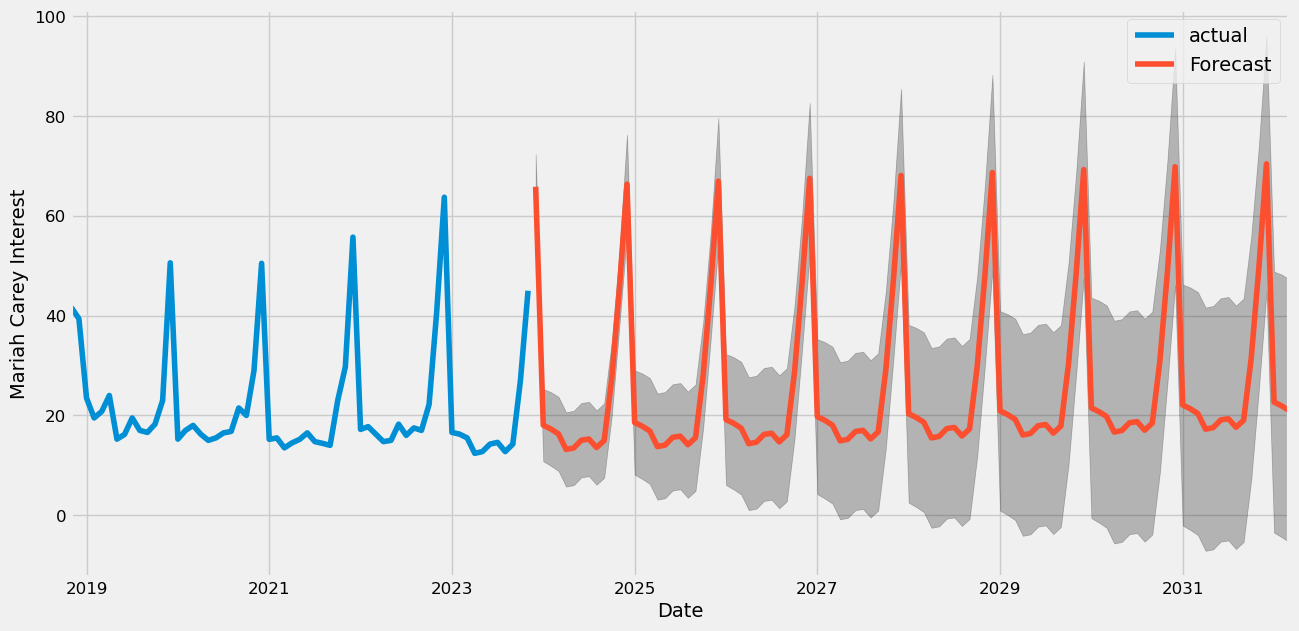

In [60]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mariah Carey Interest')
plt.legend()
plt.show()